___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import (classification_report, confusion_matrix ,RocCurveDisplay,
    roc_auc_score, roc_curve ,
    accuracy_score, 
    precision_recall_curve,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc)
from scikitplot.metrics import plot_roc, precision_recall_curve,plot_precision_recall 
from sklearn.metrics import PrecisionRecallDisplay


from sklearn.model_selection import cross_val_score, cross_validate
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint, Callback
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna
from scipy.stats import skew
from sklearn.ensemble import RandomForestClassifier
from keras import backend as K
from tensorflow.keras.layers import Dropout


%matplotlib inline

#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

In [2]:


# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import tensorflow as tf

tf.__version__

'2.14.0'

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [4]:
df=pd.read_csv('1-Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
#drop row number and customerid
df.drop(['RowNumber','CustomerId'],axis=1,inplace=True)

In [10]:
df.describe().T
#drop row number and customerid

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [11]:
df.describe(include='O').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [12]:
df.drop(['Surname'], axis=1,inplace=True)

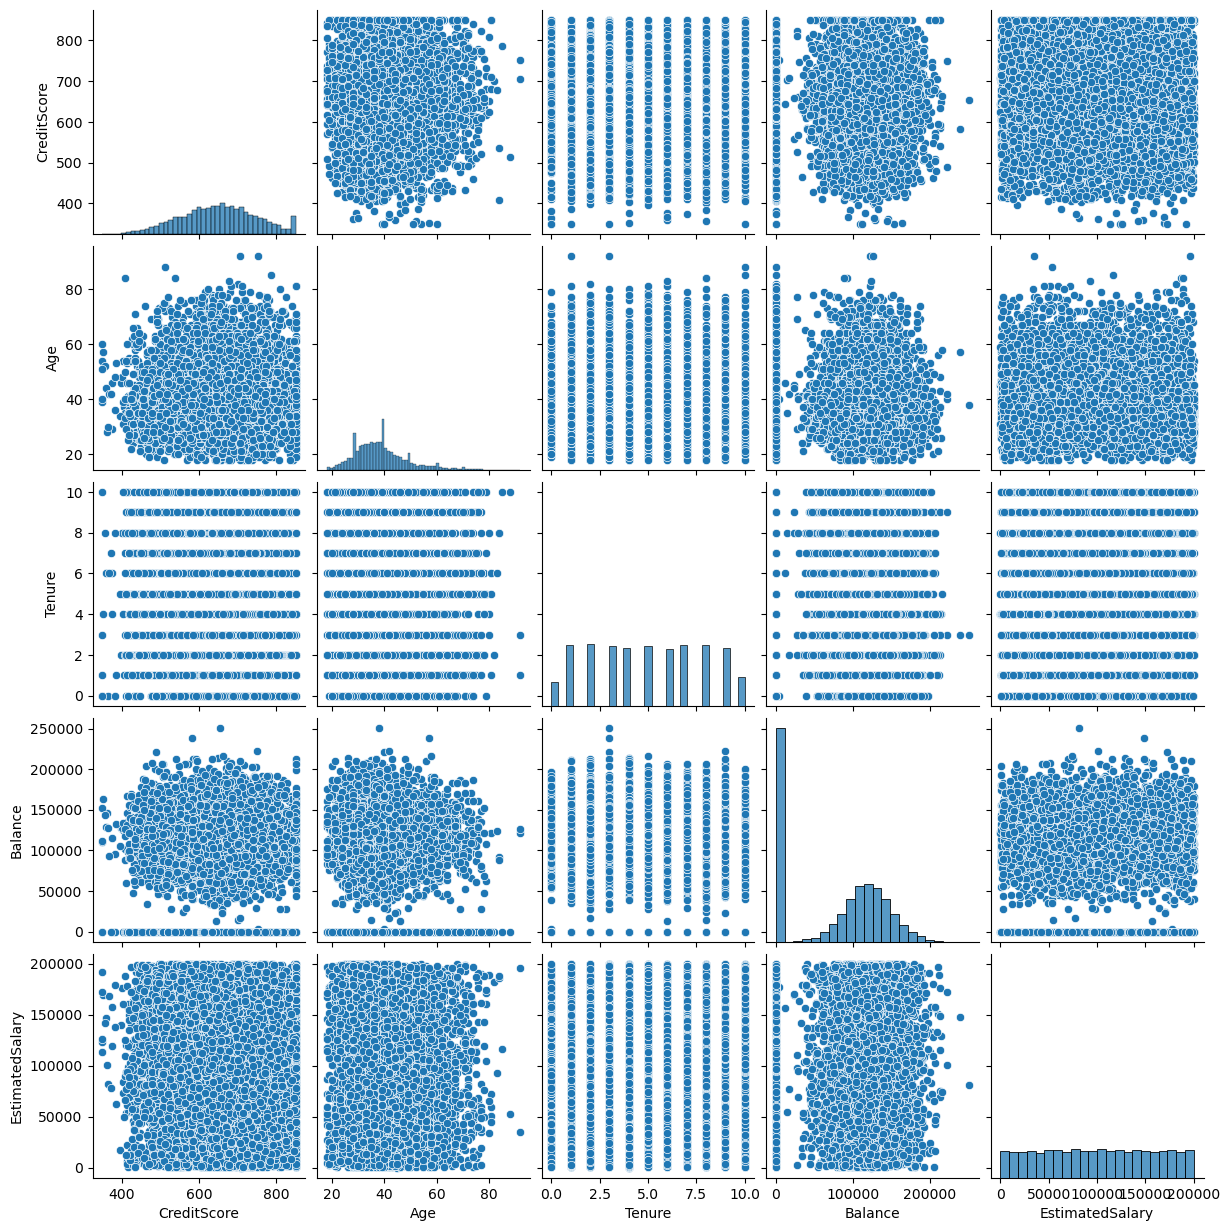

In [13]:
sns.pairplot(df.drop(['Exited','Gender','Geography','IsActiveMember','HasCrCard','NumOfProducts'], axis=1))
plt.show()

In [14]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

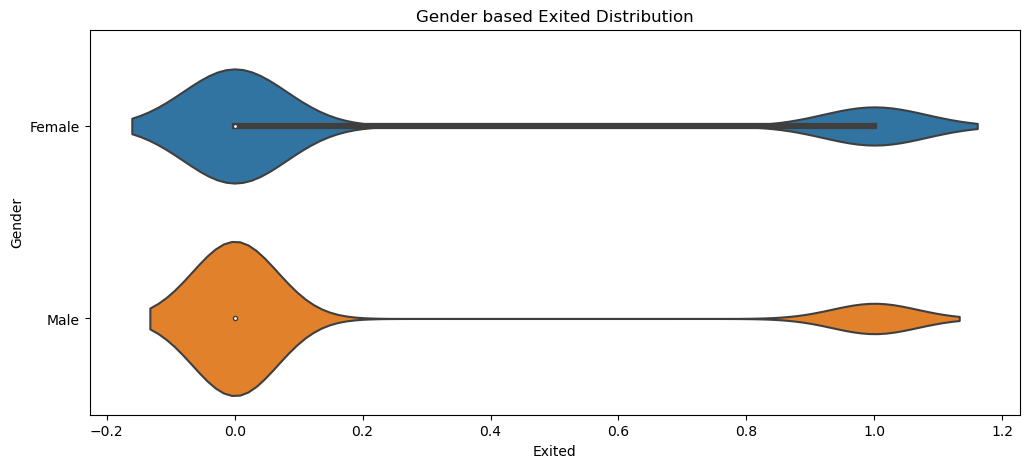

In [15]:
plt.figure(figsize=(12, 5))
sns.violinplot(x='Exited', y='Gender', data=df, orient="h")
plt.title('Gender based Exited Distribution')
plt.show()

In [16]:
numeric_df = df.select_dtypes(include='number')

numeric_df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


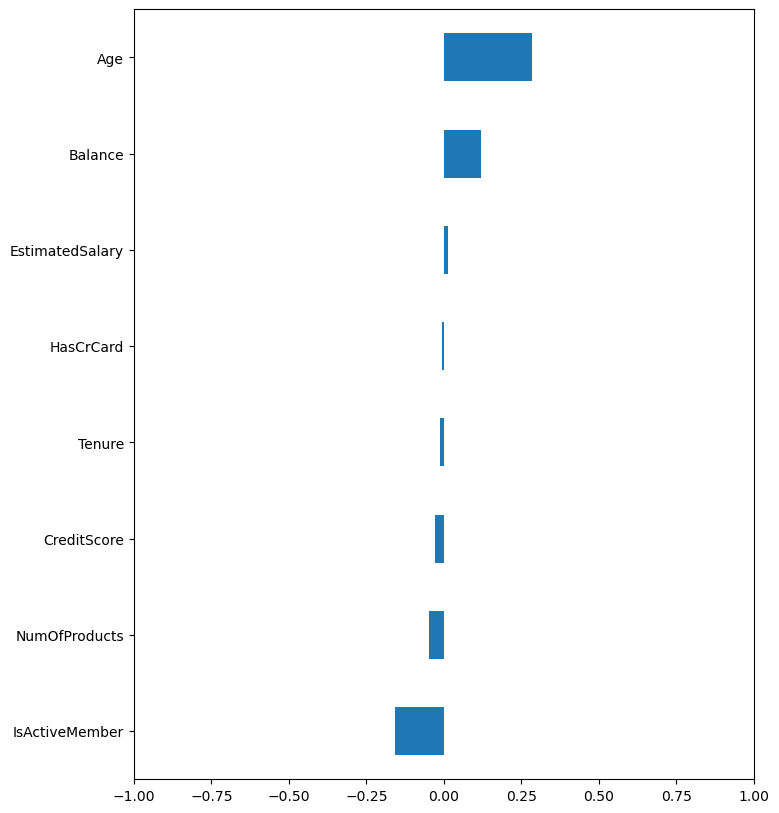

In [17]:
plt.figure(figsize=(8, 10))
ax = (df.corr(numeric_only=True)["Exited"].sort_values().drop("Exited")).plot(kind="barh")
ax.set_xlim([-1, 1])
plt.show()

<Axes: >

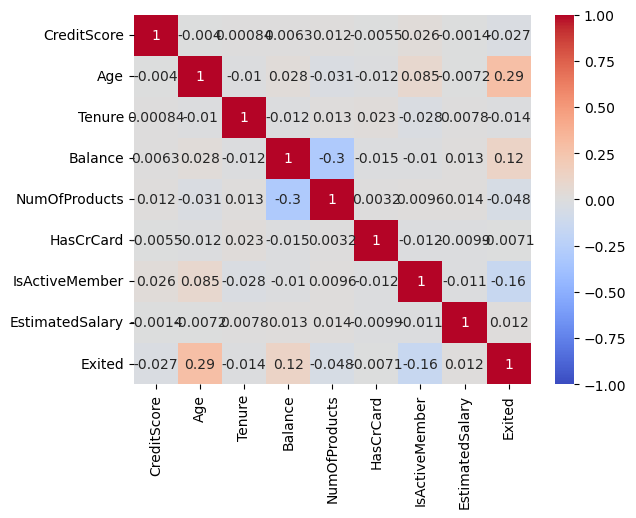

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm")

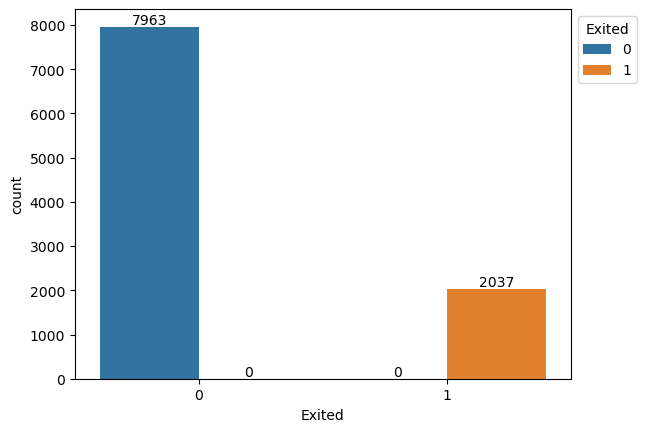

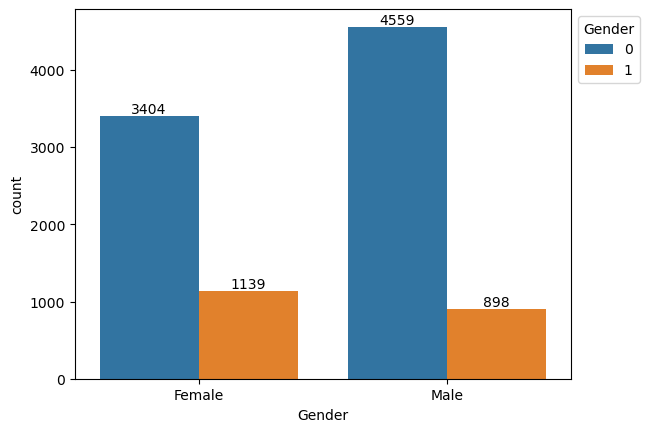

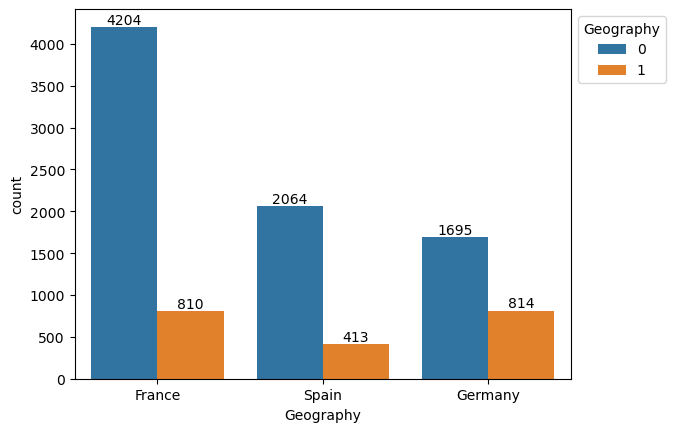

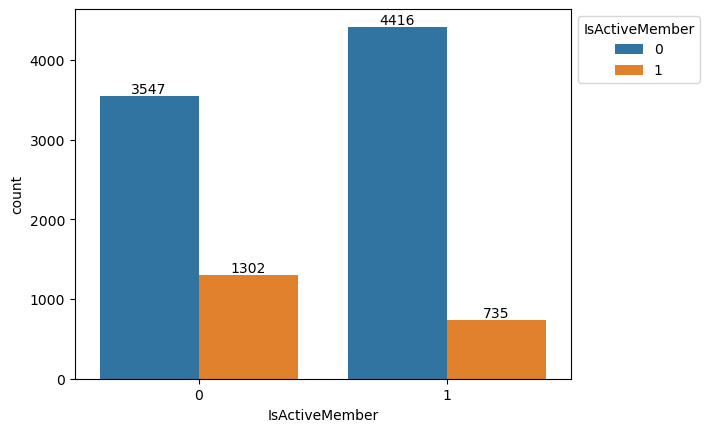

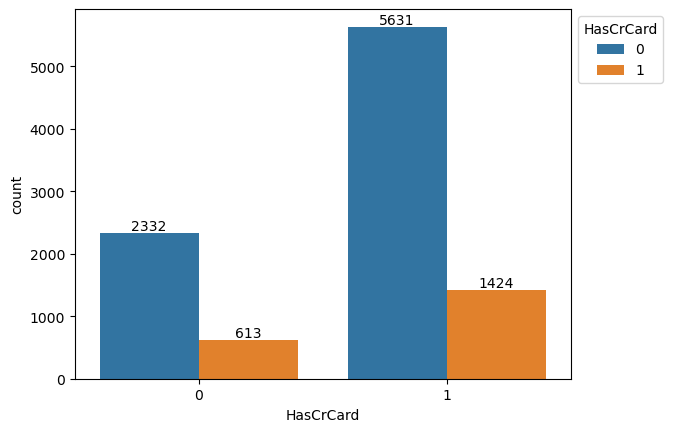

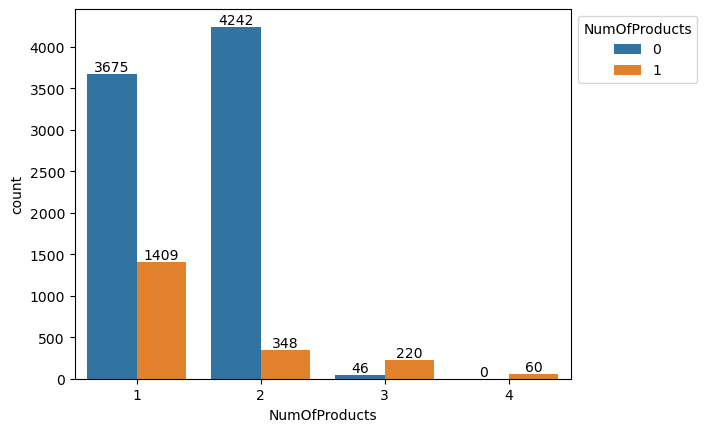

In [19]:
df_plot=df[['Exited','Gender','Geography','IsActiveMember','HasCrCard','NumOfProducts']]
for column in df_plot.columns:
    # Create the countplot for the current column
    p = sns.countplot(data=df_plot, x=column, hue='Exited')

    # Configure the legend
    p.legend(title=column, bbox_to_anchor=(1, 1), loc='upper left')

    # Add labels to the bars
    for c in p.containers:
        p.bar_label(c, fmt='%.0f', label_type='edge')

    # Display the plot
    plt.show()

In [20]:
df.groupby(['Exited']).count()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,
0,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963
1,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037


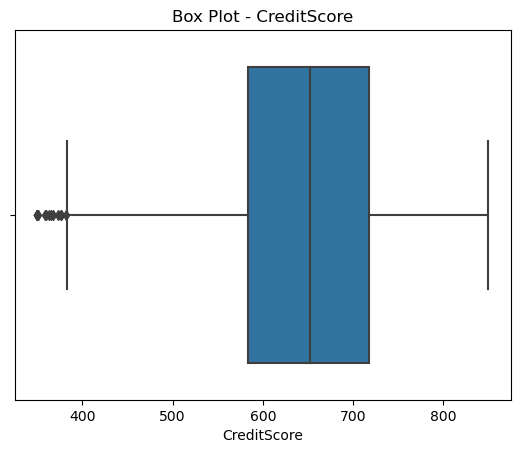

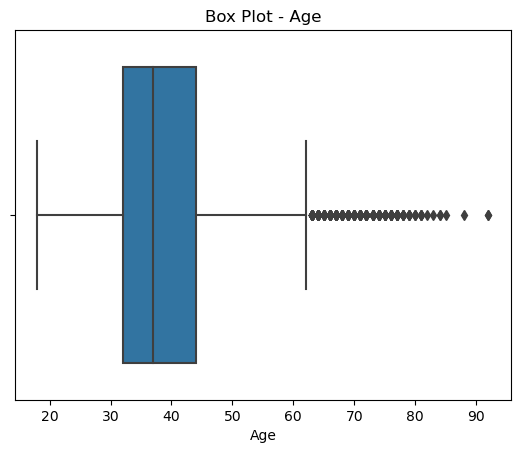

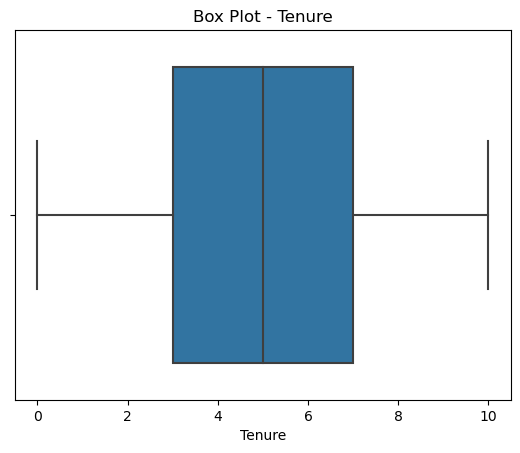

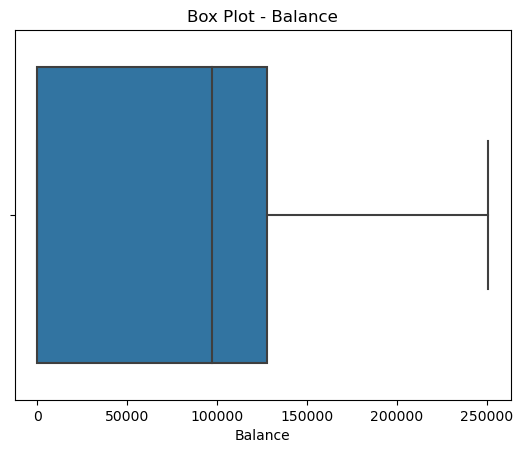

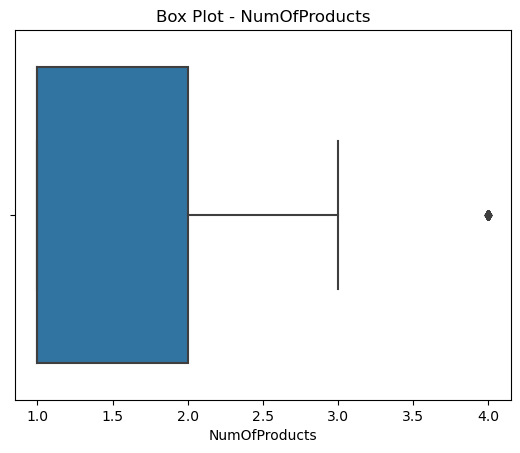

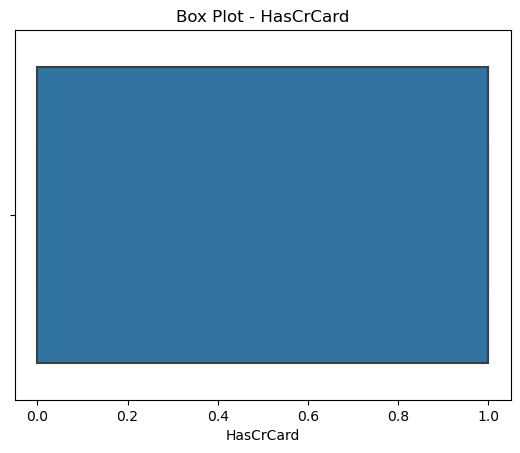

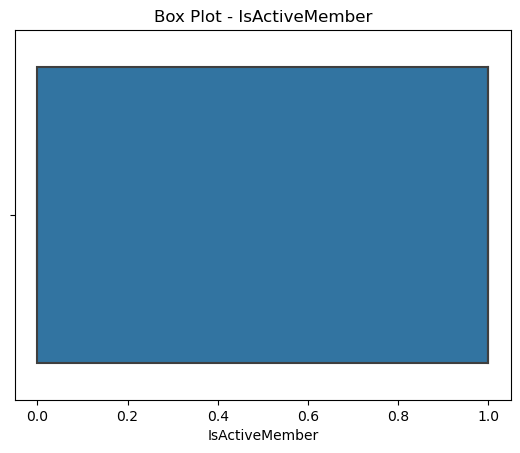

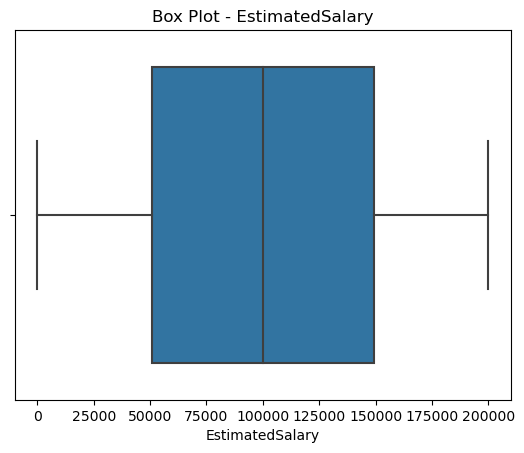

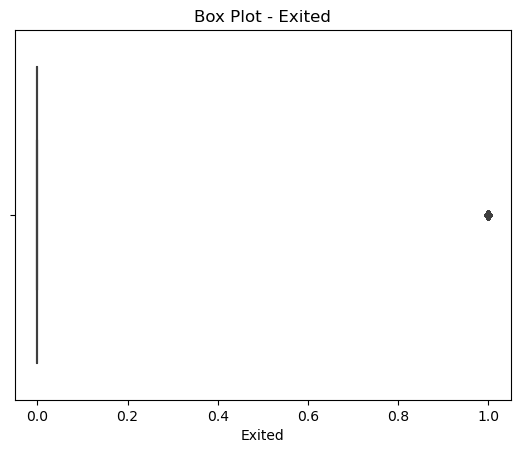

In [21]:
for column in df.columns:
    # Check if the column is numeric
    if df[column].dtype in ['int64', 'float64']:
        # Create the box plot for the current column
        sns.boxplot(data=df, x=column)

        # Set the title of the plot
        plt.title(f'Box Plot - {column}')

        # Display the plot
        plt.show()

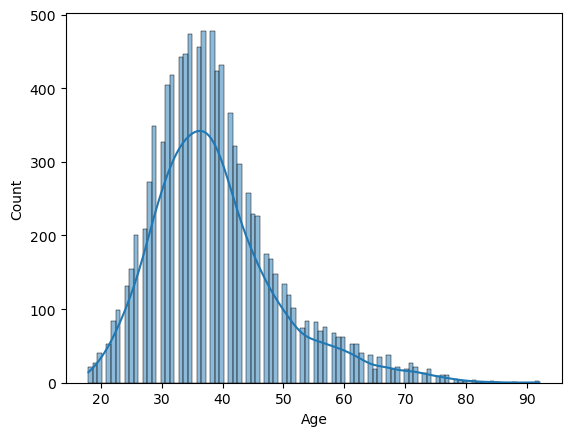

In [22]:
sns.histplot(df.Age, bins=100, kde=True);

# i tried to keep the values until 85 but class 1 decreased

In [23]:
skew(df["Age"])

1.0111685586628079

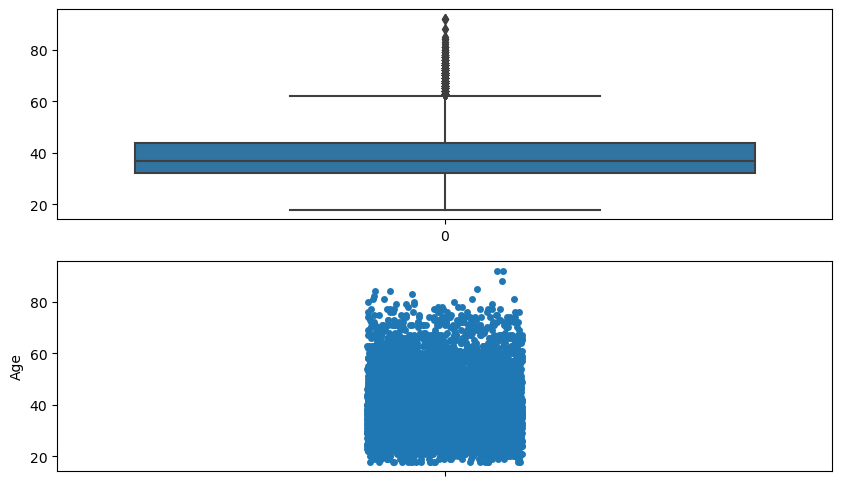

In [24]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(df.Age)

plt.subplot(212)
sns.stripplot(df.Age);

In [25]:
df['Exited']

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Preprocessing of Data
- Train | Test Split, Scalling

In [26]:
X=df.drop(['Exited'],axis=1)
y=df['Exited']

In [27]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [28]:
seed=42

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed ,stratify=y
)

In [30]:
X_train.shape

(7000, 10)

In [31]:
y_train.shape

(7000,)

In [32]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9136,595,France,Male,20,4,95830.43,1,1,0,177738.98
6410,689,Spain,Female,63,1,0.00,2,1,1,186526.12
2607,814,France,Male,31,1,118870.92,1,1,0,101704.19
3201,722,France,Male,20,6,0.00,2,1,0,195486.28
3330,738,France,Male,18,4,0.00,2,1,1,47799.15
...,...,...,...,...,...,...,...,...,...,...
1467,624,Germany,Female,35,0,180303.24,2,1,0,163587.90
4644,712,Spain,Male,74,5,0.00,2,0,0,151425.82
8942,667,France,Female,37,9,71786.90,2,1,1,67734.79
2935,687,Spain,Male,35,8,100988.39,2,1,0,22247.27


In [33]:
y_train.value_counts()

Exited
0    5574
1    1426
Name: count, dtype: int64

In [34]:
cat_onehot = ['Geography', 'Gender']


In [35]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
    remainder="passthrough"
)

# Create a pipeline
operations = [("encoder", column_trans), ("scaler", MinMaxScaler())]
pipe_model = Pipeline(steps=operations)

# Transform the data
X_train_transformed = pipe_model.fit_transform(X_train)
X_test_transformed = pipe_model.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [36]:
tf.random.set_seed(seed)

model = Sequential()


model = Sequential()
model.add(Dense(32, activation="relu", input_dim=X_train_transformed.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
# i choose recall instead of accuracy because the data imbalanced
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])


In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 18)                594       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 6)                 60        
                                                                 
 dense_4 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1280 (5.00 KB)
Trainable params: 1280 (5.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.fit(x=X_train_transformed, y=y_train,validation_split=0.1, epochs=1000, batch_size=30)

Epoch 1/1000
210/210 [==============================] - 3s 5ms/step - loss: 0.5036 - recall: 0.0078 - val_loss: 0.4684 - val_recall: 0.0000e+00
Epoch 2/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.4619 - recall: 0.0000e+00 - val_loss: 0.4519 - val_recall: 0.0000e+00
Epoch 3/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.4468 - recall: 0.0290 - val_loss: 0.4374 - val_recall: 0.0671
Epoch 4/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.4328 - recall: 0.1582 - val_loss: 0.4271 - val_recall: 0.2550
Epoch 5/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.4200 - recall: 0.2443 - val_loss: 0.4137 - val_recall: 0.3221
Epoch 6/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.4087 - recall: 0.2874 - val_loss: 0.4159 - val_recall: 0.4631
Epoch 7/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.3928 - recall: 0.3383 - val_loss: 0.3822 - val_recall: 0.4228
Epoch 8/

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [39]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(13, 32) dtype=float32, numpy=
 array([[ 2.28496060e-01,  1.21733963e-01,  2.72187203e-01,
         -9.48265716e-02,  2.17749193e-01,  1.60414577e-01,
         -7.04203844e-01, -3.49929869e-01, -4.62304093e-02,
          6.51053861e-02, -5.88531971e-01, -6.71050072e-01,
          1.50324136e-01, -4.32492644e-02,  2.21922368e-01,
          5.16652405e-01, -6.79079592e-01,  4.23314661e-01,
         -5.73331416e-02,  3.98510933e-01,  1.15762837e-02,
         -5.83619237e-01,  2.95042060e-02, -3.66072536e-01,
          1.96833089e-01,  3.60412031e-01, -3.80362511e-01,
         -1.68625936e-02, -1.12771451e+00, -1.53791621e-01,
          6.27364576e-01,  8.77792835e-02],
        [-5.94584227e-01, -3.37113887e-01, -3.15931648e-01,
         -8.24137777e-02,  1.30671591e-01, -8.98932815e-02,
          5.14824092e-01, -2.83730924e-01, -1.58060417e-01,
         -2.54828364e-01,  1.74309343e-01,  2.10128009e-01,
         -2.72010922e-01,  2.38458797e-01, -6.98

In [40]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.503599,0.007831,0.468363,0.000000
1,0.461929,0.000000,0.451940,0.000000
2,0.446812,0.028974,0.437432,0.067114
3,0.432775,0.158183,0.427108,0.255034
4,0.420035,0.244323,0.413679,0.322148


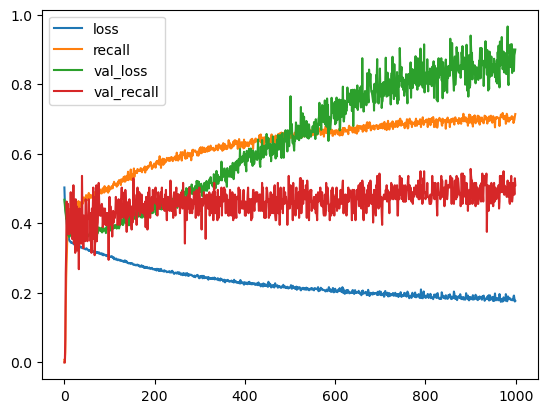

In [41]:
loss_df.plot()
plt.show()

In [42]:
loss, recall = model.evaluate(X_test_transformed, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.8310370445251465
recall:  0.4991816580295563


In [43]:
y_pred = model.predict(X_test_transformed) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 2ms/step
[[2168  221]
 [ 306  305]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2389
           1       0.58      0.50      0.54       611

    accuracy                           0.82      3000
   macro avg       0.73      0.70      0.71      3000
weighted avg       0.82      0.82      0.82      3000



94/94 [==============================] - 0s 2ms/step


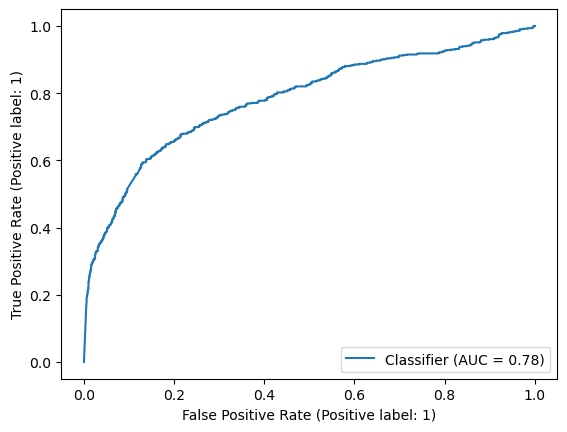

In [44]:
y_pred_proba = model.predict(X_test_transformed) # > 0.5 ?
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [45]:
roc_auc_score(y_test, y_pred_proba)

0.7833749749088669

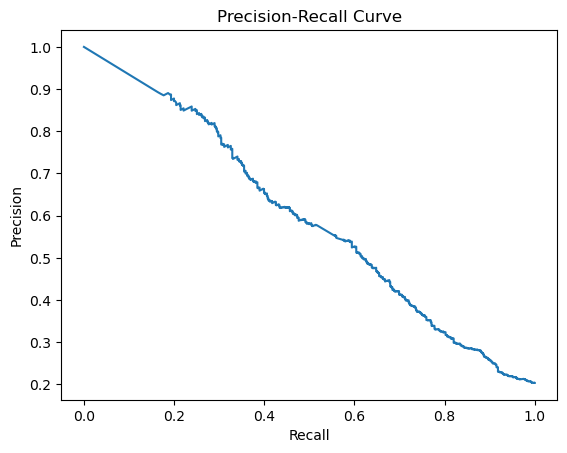

In [46]:
#since we have imbalanced data using precision_recall more reliable
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [47]:
class_weights = {0: 1.0, 1: 2.0} 

In [48]:
tf.random.set_seed(seed)

model1 = Sequential()


model1 = Sequential()
model1.add(Dense(32, activation="relu", input_dim=X_train_transformed.shape[1]))
model1.add(Dense(18, activation="relu"))
model1.add(Dense(9, activation="relu"))
model1.add(Dense(6, activation="relu"))
model1.add(Dense(1, activation="sigmoid"))
model1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [49]:
model1.fit(X_train_transformed, y_train,validation_split=0.1, epochs=1000, batch_size=30,class_weight=class_weights)

Epoch 1/1000
210/210 [==============================] - 2s 4ms/step - loss: 0.7563 - recall: 0.0227 - val_loss: 0.5060 - val_recall: 0.1745
Epoch 2/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.6996 - recall: 0.2858 - val_loss: 0.4699 - val_recall: 0.4430
Epoch 3/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.6693 - recall: 0.3962 - val_loss: 0.4349 - val_recall: 0.3691
Epoch 4/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.6490 - recall: 0.4033 - val_loss: 0.4637 - val_recall: 0.4966
Epoch 5/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.6309 - recall: 0.4268 - val_loss: 0.4430 - val_recall: 0.4966
Epoch 6/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.6080 - recall: 0.4424 - val_loss: 0.4449 - val_recall: 0.6242
Epoch 7/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.5774 - recall: 0.4996 - val_loss: 0.4166 - val_recall: 0.5906
Epoch 8/1000
210/210

In [50]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                448       
                                                                 
 dense_6 (Dense)             (None, 18)                594       
                                                                 
 dense_7 (Dense)             (None, 9)                 171       
                                                                 
 dense_8 (Dense)             (None, 6)                 60        
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1280 (5.00 KB)
Trainable params: 1280 (5.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [51]:
loss_df = pd.DataFrame(model1.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.756289,0.022709,0.506005,0.174497
1,0.699634,0.285826,0.469881,0.442953
2,0.669298,0.396241,0.434858,0.369128
3,0.649045,0.403289,0.463672,0.496644
4,0.630891,0.426782,0.442951,0.496644


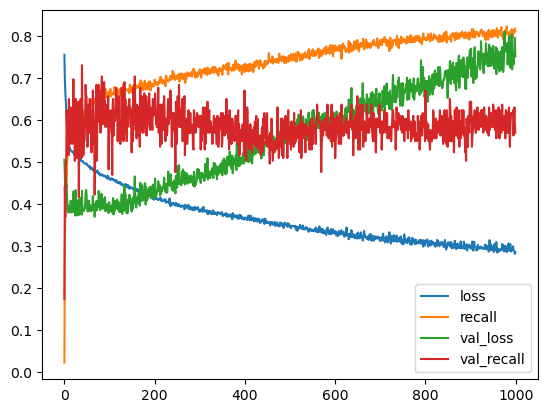

In [52]:
loss_df.plot()
plt.show()

In [53]:
loss, recall = model1.evaluate(X_test_transformed, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.7684294581413269
recall:  0.5466448664665222


In [54]:
y_pred = model1.predict(X_test_transformed) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 2ms/step
[[2067  322]
 [ 277  334]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2389
           1       0.51      0.55      0.53       611

    accuracy                           0.80      3000
   macro avg       0.70      0.71      0.70      3000
weighted avg       0.81      0.80      0.80      3000



94/94 [==============================] - 0s 2ms/step


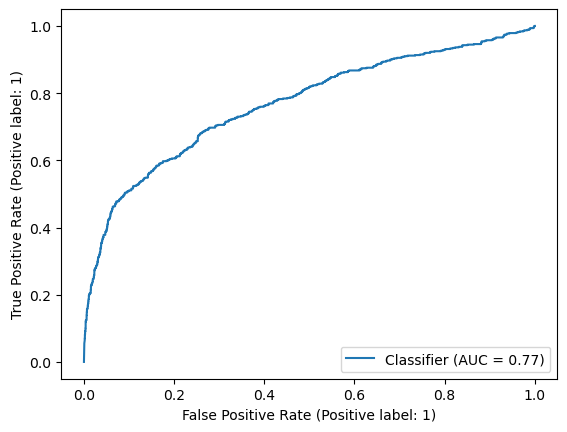

In [55]:
y_pred_proba = model1.predict(X_test_transformed)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [56]:
roc_auc_score(y_test, y_pred_proba)

0.7676629587738125

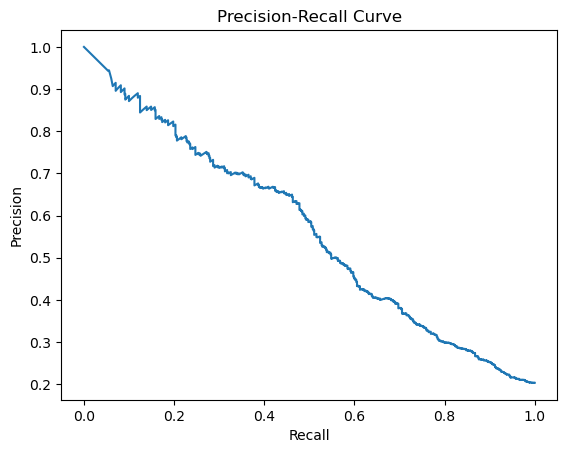

In [57]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [62]:
tf.random.set_seed(seed)


model2 = Sequential()
model2.add(Dense(32, activation="relu", input_dim=X_train_transformed.shape[1]))
model2.add(Dense(18, activation="relu"))
model2.add(Dense(9, activation="relu"))
model2.add(Dense(6, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model2.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [63]:
model2.fit(X_train_transformed, y_train,validation_split=0.1, epochs=1000, batch_size=30,class_weight=class_weights)

Epoch 1/1000
210/210 [==============================] - 2s 4ms/step - loss: 0.7245 - recall: 0.0807 - val_loss: 0.5019 - val_recall: 0.3826
Epoch 2/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.6652 - recall: 0.4064 - val_loss: 0.4118 - val_recall: 0.6376
Epoch 3/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.5841 - recall: 0.5348 - val_loss: 0.3741 - val_recall: 0.4362
Epoch 4/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.5652 - recall: 0.5223 - val_loss: 0.4311 - val_recall: 0.6376
Epoch 5/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.5615 - recall: 0.5364 - val_loss: 0.4330 - val_recall: 0.5638
Epoch 6/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.5535 - recall: 0.5270 - val_loss: 0.4553 - val_recall: 0.7248
Epoch 7/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.5469 - recall: 0.5779 - val_loss: 0.4038 - val_recall: 0.6309
Epoch 8/1000
210/210

In [64]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.724486,0.080658,0.501937,0.382550
1,0.665173,0.406421,0.411830,0.637584
2,0.584136,0.534847,0.374057,0.436242
3,0.565213,0.522318,0.431117,0.637584
4,0.561480,0.536413,0.433037,0.563758


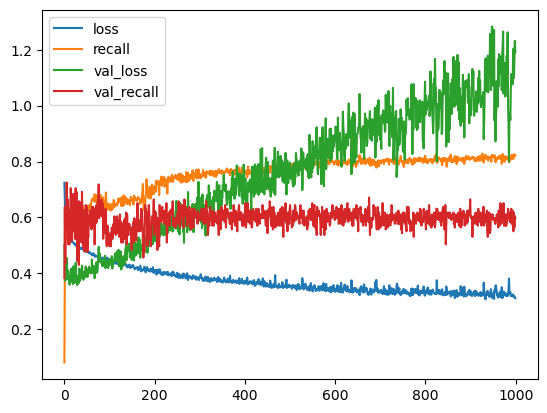

In [65]:
loss_df.plot()
plt.show()

In [66]:
loss, recall = model2.evaluate(X_test_transformed, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  1.0294585227966309
recall:  0.6317512392997742


In [67]:
y_pred = model2.predict(X_test_transformed) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 1s 4ms/step
[[1949  440]
 [ 225  386]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.85      2389
           1       0.47      0.63      0.54       611

    accuracy                           0.78      3000
   macro avg       0.68      0.72      0.70      3000
weighted avg       0.81      0.78      0.79      3000



94/94 [==============================] - 0s 4ms/step


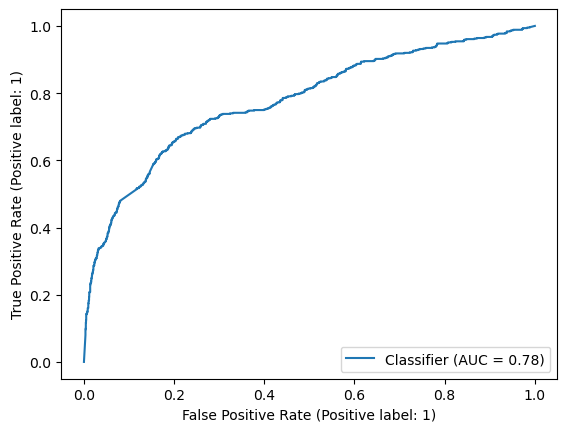

In [68]:
y_pred_proba = model2.predict(X_test_transformed)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [69]:
roc_auc_score(y_test, y_pred_proba)

0.7778206715312065

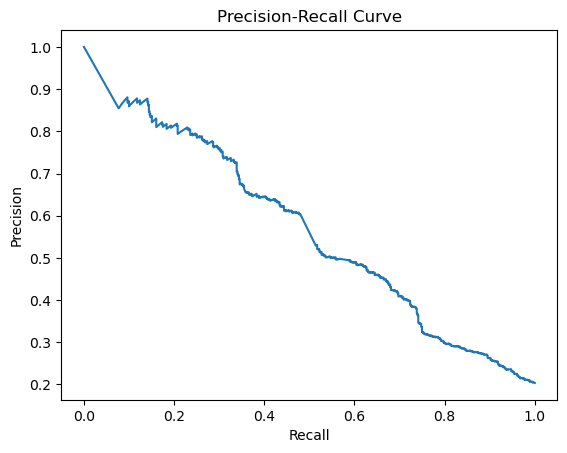

In [70]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Add Dropout Layer

In [71]:
from tensorflow.keras.layers import Dropout

In [72]:
tf.random.set_seed(seed)

model3 = Sequential()
model3.add(Dense(32, activation="relu", input_dim=X_train_transformed.shape[1]))
model3.add(Dropout(0.2))

model3.add(Dense(18, activation="relu"))
model3.add(Dropout(0.2))

model3.add(Dense(9, activation="relu"))
model3.add(Dropout(0.2))

model3.add(Dense(1, activation="sigmoid"))


opt = Adam(learning_rate=0.001)
model3.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [73]:
model3.fit(X_train_transformed, y_train,validation_split=0.1, epochs=1000, batch_size=30,class_weight=class_weights)

Epoch 1/1000
210/210 [==============================] - 3s 6ms/step - loss: 0.7688 - recall: 0.0462 - val_loss: 0.5304 - val_recall: 0.0000e+00
Epoch 2/1000
210/210 [==============================] - 1s 4ms/step - loss: 0.7433 - recall: 0.0752 - val_loss: 0.4997 - val_recall: 0.0604
Epoch 3/1000
210/210 [==============================] - 1s 4ms/step - loss: 0.7328 - recall: 0.1785 - val_loss: 0.4970 - val_recall: 0.2483
Epoch 4/1000
210/210 [==============================] - 1s 4ms/step - loss: 0.7162 - recall: 0.2263 - val_loss: 0.5087 - val_recall: 0.4027
Epoch 5/1000
210/210 [==============================] - 1s 4ms/step - loss: 0.7086 - recall: 0.3046 - val_loss: 0.4970 - val_recall: 0.3221
Epoch 6/1000
210/210 [==============================] - 1s 4ms/step - loss: 0.6941 - recall: 0.2803 - val_loss: 0.4787 - val_recall: 0.3893
Epoch 7/1000
210/210 [==============================] - 1s 4ms/step - loss: 0.6857 - recall: 0.3195 - val_loss: 0.4554 - val_recall: 0.3624
Epoch 8/1000
210

In [74]:
loss_df = pd.DataFrame(model3.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.768836,0.046202,0.530383,0.000000
1,0.743259,0.075176,0.499665,0.060403
2,0.732850,0.178543,0.497012,0.248322
3,0.716230,0.226312,0.508658,0.402685
4,0.708634,0.304620,0.496977,0.322148


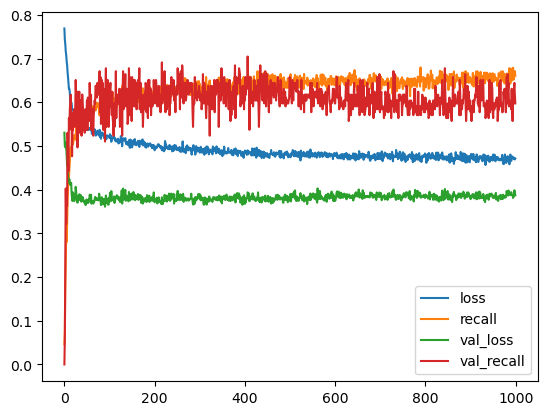

In [75]:
loss_df.plot()
plt.show()

In [76]:
loss, recall = model3.evaluate(X_test_transformed, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.373383492231369
recall:  0.6202945709228516


In [77]:
y_pred = model3.predict(X_test_transformed) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 3ms/step
[[2140  249]
 [ 232  379]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2389
           1       0.60      0.62      0.61       611

    accuracy                           0.84      3000
   macro avg       0.75      0.76      0.76      3000
weighted avg       0.84      0.84      0.84      3000



94/94 [==============================] - 0s 3ms/step


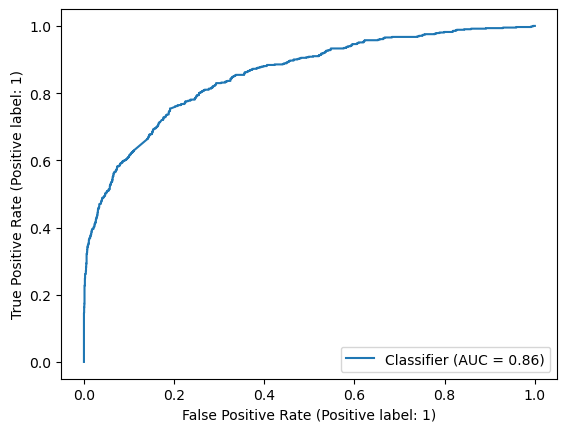

In [78]:
y_pred_proba = model3.predict(X_test_transformed)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [79]:
roc_auc_score(y_test, y_pred_proba)

0.8555713276686177

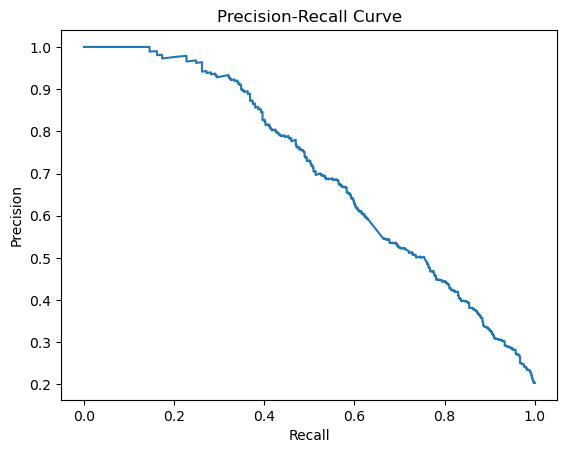

In [80]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Add Early Stop

#### Monitor the "val_loss" as metric

In [81]:
tf.random.set_seed(seed)


model4 = Sequential()
model4.add(Dense(32, activation="relu", input_dim=X_train_transformed.shape[1]))
model4.add(Dense(18, activation="relu"))
model4.add(Dense(9, activation="relu"))
model4.add(Dense(6, activation="relu"))
model4.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model4.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [82]:
checkpoint = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True)

In [83]:
model4.fit(X_train_transformed, y_train,validation_split=0.1, epochs=1000, batch_size=30,class_weight=class_weights,callbacks=[checkpoint])

Epoch 1/1000
210/210 [==============================] - 2s 4ms/step - loss: 0.7632 - recall: 0.0838 - val_loss: 0.5133 - val_recall: 0.2416
Epoch 2/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.6919 - recall: 0.3422 - val_loss: 0.4761 - val_recall: 0.4161
Epoch 3/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.6626 - recall: 0.4229 - val_loss: 0.4418 - val_recall: 0.3691
Epoch 4/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.6493 - recall: 0.4143 - val_loss: 0.4680 - val_recall: 0.5034
Epoch 5/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.6365 - recall: 0.4464 - val_loss: 0.4496 - val_recall: 0.4631
Epoch 6/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.6239 - recall: 0.4479 - val_loss: 0.4926 - val_recall: 0.6242
Epoch 7/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.6070 - recall: 0.4918 - val_loss: 0.4275 - val_recall: 0.5436
Epoch 8/1000
210/210

In [84]:
loss_df = pd.DataFrame(model4.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.763236,0.083790,0.513309,0.241611
1,0.691929,0.342208,0.476118,0.416107
2,0.662620,0.422866,0.441750,0.369128
3,0.649333,0.414252,0.467961,0.503356
4,0.636477,0.446359,0.449573,0.463087


In [85]:
loss, accuracy = model4.evaluate(X_test_transformed, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

94/94 [==============================] - 0s 2ms/step - loss: 0.3351 - recall: 0.4861
Loss: 0.33509260416030884
Accuracy: 0.486088365316391


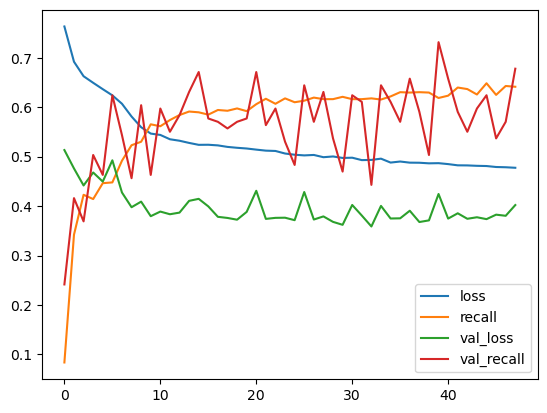

In [86]:
loss_df.plot()
plt.show()

In [87]:
y_pred = model4.predict(X_test_transformed) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 2ms/step
[[2290   99]
 [ 314  297]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2389
           1       0.75      0.49      0.59       611

    accuracy                           0.86      3000
   macro avg       0.81      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



94/94 [==============================] - 0s 3ms/step


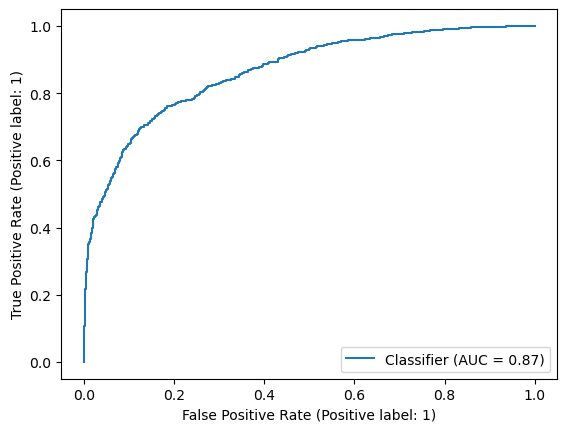

In [88]:
y_pred_proba = model4.predict(X_test_transformed)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [89]:
roc_auc_score(y_test, y_pred_proba)

0.8660424655009766

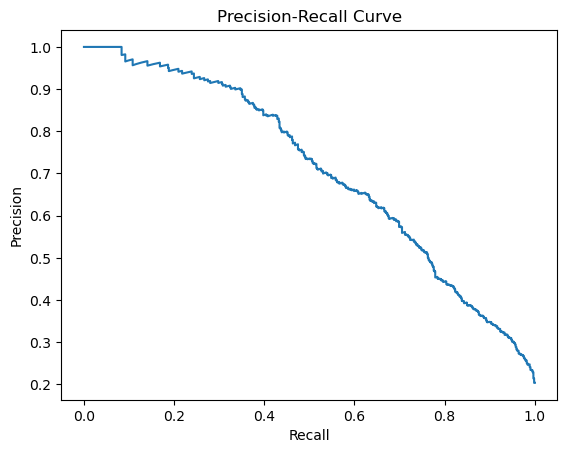

In [90]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

#### Monitor the "val_recall" as metric

In [91]:
tf.random.set_seed(seed)

model5 = Sequential()
model5.add(Dense(32, activation="relu", input_dim=X_train_transformed.shape[1]))
model5.add(Dense(18, activation="relu"))
model5.add(Dense(9, activation="relu"))
model5.add(Dense(6, activation="relu"))
model5.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model5.compile(optimizer=opt, loss="binary_crossentropy", metrics=[tf.keras.metrics.Recall()])

In [92]:
checkpoint = EarlyStopping(monitor="val_recall", mode="min", verbose=1, patience=15, restore_best_weights=True)

In [93]:
model5.fit(X_train_transformed, y_train,validation_split=0.1, epochs=1000, batch_size=30,class_weight=class_weights,callbacks=[checkpoint])

Epoch 1/1000
210/210 [==============================] - 2s 6ms/step - loss: 0.7652 - recall: 0.0157 - val_loss: 0.5074 - val_recall: 0.0671
Epoch 2/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.7028 - recall: 0.2584 - val_loss: 0.4688 - val_recall: 0.3020
Epoch 3/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.6742 - recall: 0.3704 - val_loss: 0.4561 - val_recall: 0.4027
Epoch 4/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.6553 - recall: 0.3962 - val_loss: 0.4693 - val_recall: 0.5302
Epoch 5/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.6369 - recall: 0.4409 - val_loss: 0.4606 - val_recall: 0.5503
Epoch 6/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.6061 - recall: 0.4832 - val_loss: 0.4640 - val_recall: 0.6510
Epoch 7/1000
210/210 [==============================] - 1s 3ms/step - loss: 0.5739 - recall: 0.5388 - val_loss: 0.4193 - val_recall: 0.6309
Epoch 8/1000
210/210

In [94]:
loss_df = pd.DataFrame(model5.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.765194,0.015662,0.507375,0.067114
1,0.702783,0.258418,0.468764,0.302013
2,0.674228,0.370399,0.456126,0.402685
3,0.655306,0.396241,0.469320,0.530201
4,0.636930,0.440877,0.460608,0.550336


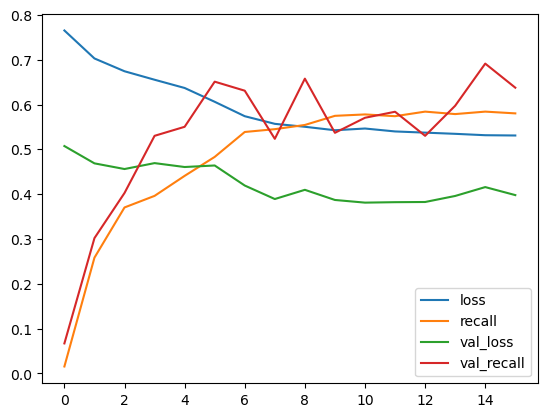

In [95]:
loss_df.plot()
plt.show()

In [96]:
loss, recall = model5.evaluate(X_test_transformed, y_test)
print("Loss:", loss)
print("recall:", recall)


94/94 [==============================] - 0s 4ms/step - loss: 0.5131 - recall: 0.0671
Loss: 0.5131077766418457
recall: 0.06710311025381088


In [97]:
y_pred = model5.predict(X_test_transformed) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 3ms/step
[[2328   61]
 [ 570   41]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2389
           1       0.40      0.07      0.12       611

    accuracy                           0.79      3000
   macro avg       0.60      0.52      0.50      3000
weighted avg       0.72      0.79      0.72      3000



94/94 [==============================] - 0s 3ms/step


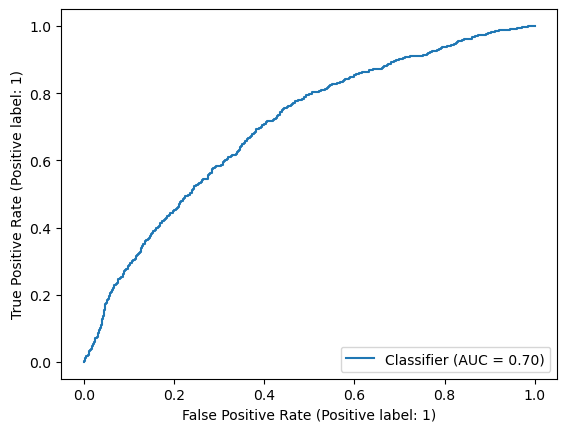

In [98]:
y_pred_proba = model5.predict(X_test_transformed)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [99]:
roc_auc_score(y_test, y_pred_proba)

0.7011781357408032

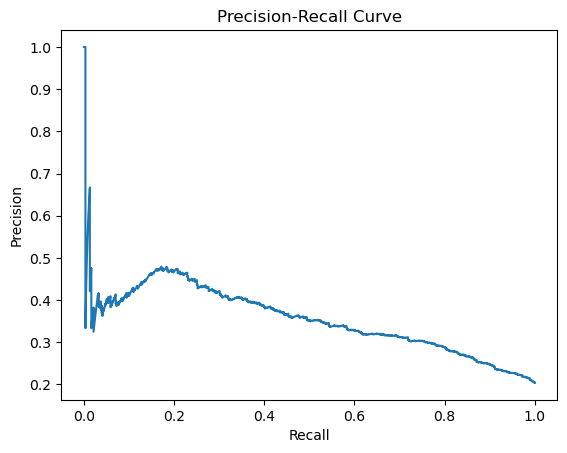

In [100]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

#### another way for val_recall

In [101]:
tf.random.set_seed(seed)

model8 = Sequential()
model8.add(Dense(6, activation="relu", input_dim=X_train_transformed.shape[1]))
model8.add(Dense(6, activation="relu"))
model8.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model8.compile(loss='binary_crossentropy', optimizer='adam', metrics=[ "Recall"])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_recall', patience=3, mode='max', verbose=1)

# Train the model
model8.fit(X_train_transformed, y_train,validation_split=0.1,epochs=1000, batch_size=30,class_weight=class_weights, callbacks=[early_stopping])


Epoch 1/1000
210/210 [==============================] - 2s 5ms/step - loss: 0.7578 - recall: 0.0000e+00 - val_loss: 0.5290 - val_recall: 0.0000e+00
Epoch 2/1000
210/210 [==============================] - 1s 5ms/step - loss: 0.7390 - recall: 0.0188 - val_loss: 0.5166 - val_recall: 0.0671
Epoch 3/1000
210/210 [==============================] - 1s 4ms/step - loss: 0.7256 - recall: 0.1229 - val_loss: 0.5056 - val_recall: 0.1745
Epoch 4/1000
210/210 [==============================] - 1s 4ms/step - loss: 0.7162 - recall: 0.2153 - val_loss: 0.5093 - val_recall: 0.3154
Epoch 5/1000
210/210 [==============================] - 1s 4ms/step - loss: 0.7110 - recall: 0.2616 - val_loss: 0.5021 - val_recall: 0.3154
Epoch 6/1000
210/210 [==============================] - 1s 4ms/step - loss: 0.7051 - recall: 0.2616 - val_loss: 0.4945 - val_recall: 0.3423
Epoch 7/1000
210/210 [==============================] - 1s 4ms/step - loss: 0.6975 - recall: 0.3226 - val_loss: 0.4782 - val_recall: 0.3289
Epoch 8/1000

In [102]:
loss_df = pd.DataFrame(model8.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.757814,0.000000,0.529011,0.000000
1,0.739046,0.018794,0.516578,0.067114
2,0.725594,0.122944,0.505560,0.174497
3,0.716226,0.215348,0.509273,0.315436
4,0.710994,0.261551,0.502079,0.315436


In [103]:
loss,recall = model8.evaluate(X_test_transformed, y_test)
print("Loss:", loss)
print("Recall:", recall)

94/94 [==============================] - 0s 3ms/step - loss: 0.4204 - recall: 0.4501
Loss: 0.4204058349132538
Recall: 0.45008182525634766


In [104]:
y_pred = model8.predict(X_test_transformed) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 3ms/step
[[2195  194]
 [ 336  275]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      2389
           1       0.59      0.45      0.51       611

    accuracy                           0.82      3000
   macro avg       0.73      0.68      0.70      3000
weighted avg       0.81      0.82      0.81      3000



94/94 [==============================] - 0s 3ms/step


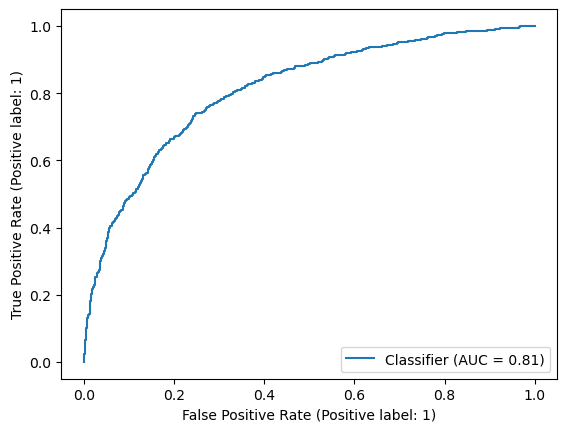

In [105]:
y_pred_proba = model8.predict(X_test_transformed)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [106]:
roc_auc_score(y_test, y_pred_proba)

0.8105871222371495

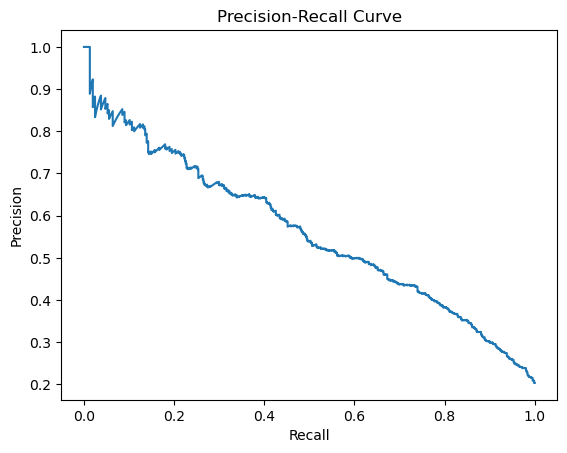

In [107]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Optuna

In [108]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)


In [109]:
trial_metric = "Recall"
batch_size = 30
tf.random.set_seed(42)


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 1, 150)
    n_units2 = trial.suggest_int("n_units2", 1, 150)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    model6 = Sequential()
    model6.add(Dense(n_units1, input_dim=X_train_transformed.shape[1], activation="relu"))
    model6.add(Dense(n_units2, activation="relu"))
    model6.add(Dense(1, activation="sigmoid"))
    model6.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model6 = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.001, 5)
    w1 = trial.suggest_loguniform("w1", 0.001, 5)
    
    model6.fit(
        X_train_transformed,
        y_train,
        validation_split=0.1,
        batch_size=batch_size,
        epochs=600,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model6.evaluate(X_test_transformed, y_test, verbose=0)[1]
    return score

In [110]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)
study.best_params

[I 2023-10-30 13:22:51,872] A new study created in memory with name: no-name-d84456a5-c92e-4934-a142-bae31c108f69


Restoring model weights from the end of the best epoch: 19.
Epoch 34: early stopping


[I 2023-10-30 13:23:19,001] Trial 0 finished with value: 0.8494271636009216 and parameters: {'n_units1': 28, 'n_units2': 30, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.04465504635091151, 'w0': 0.008721822785958998, 'w1': 1.4321270173425962}. Best is trial 0 with value: 0.8494271636009216.


Restoring model weights from the end of the best epoch: 2.
Epoch 17: early stopping


[I 2023-10-30 13:23:32,106] Trial 1 finished with value: 0.4320785701274872 and parameters: {'n_units1': 94, 'n_units2': 2, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.03090925316127339, 'w0': 1.1456515952706603, 'w1': 0.5008225130960859}. Best is trial 0 with value: 0.8494271636009216.


Restoring model weights from the end of the best epoch: 50.
Epoch 65: early stopping


[I 2023-10-30 13:24:29,614] Trial 2 finished with value: 0.23404255509376526 and parameters: {'n_units1': 7, 'n_units2': 134, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.00014998295304152162, 'w0': 3.333582782761842, 'w1': 0.005081382418130278}. Best is trial 0 with value: 0.8494271636009216.


Restoring model weights from the end of the best epoch: 68.
Epoch 83: early stopping


[I 2023-10-30 13:25:43,352] Trial 3 finished with value: 0.88707035779953 and parameters: {'n_units1': 11, 'n_units2': 76, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 5.8921671331041126e-05, 'w0': 0.0018978585295788275, 'w1': 0.39935007703134406}. Best is trial 3 with value: 0.88707035779953.


Restoring model weights from the end of the best epoch: 15.
Epoch 30: early stopping


[I 2023-10-30 13:26:07,981] Trial 4 finished with value: 0.2995089888572693 and parameters: {'n_units1': 31, 'n_units2': 42, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0013136004638651607, 'w0': 4.269778487965346, 'w1': 0.23226006796541743}. Best is trial 3 with value: 0.88707035779953.


Restoring model weights from the end of the best epoch: 15.
Epoch 30: early stopping


[I 2023-10-30 13:26:28,991] Trial 5 finished with value: 0.32569557428359985 and parameters: {'n_units1': 106, 'n_units2': 90, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 3.65270501595472e-05, 'w0': 0.018954568786097883, 'w1': 0.0021148502750277325}. Best is trial 3 with value: 0.88707035779953.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-10-30 13:26:42,101] Trial 6 finished with value: 0.5630114674568176 and parameters: {'n_units1': 134, 'n_units2': 146, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0015152502112455027, 'w0': 1.6461164840949871, 'w1': 3.2418481676480733}. Best is trial 3 with value: 0.88707035779953.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 13:26:53,862] Trial 7 finished with value: 0.41243863105773926 and parameters: {'n_units1': 79, 'n_units2': 22, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.002340578395877539, 'w0': 0.14985773907459243, 'w1': 0.029509317725214968}. Best is trial 3 with value: 0.88707035779953.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 13:27:06,260] Trial 8 finished with value: 0.3698854446411133 and parameters: {'n_units1': 21, 'n_units2': 92, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.04075207877310584, 'w0': 0.13470028115819627, 'w1': 0.03718308769966964}. Best is trial 3 with value: 0.88707035779953.


Restoring model weights from the end of the best epoch: 17.
Epoch 32: early stopping


[I 2023-10-30 13:27:28,160] Trial 9 finished with value: 0.8936170339584351 and parameters: {'n_units1': 66, 'n_units2': 26, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00048790882762229893, 'w0': 0.027880124207598656, 'w1': 3.1293827285334586}. Best is trial 9 with value: 0.8936170339584351.


Restoring model weights from the end of the best epoch: 17.
Epoch 32: early stopping


[I 2023-10-30 13:27:49,898] Trial 10 finished with value: 0.9443535208702087 and parameters: {'n_units1': 55, 'n_units2': 54, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 1.4769758761265009e-05, 'w0': 0.001358761728575466, 'w1': 4.197567848244008}. Best is trial 10 with value: 0.9443535208702087.


Restoring model weights from the end of the best epoch: 4.
Epoch 19: early stopping


[I 2023-10-30 13:28:03,266] Trial 11 finished with value: 0.9459902048110962 and parameters: {'n_units1': 55, 'n_units2': 50, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 1.6244616983286322e-05, 'w0': 0.001153801674519332, 'w1': 4.901799297743144}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 4.
Epoch 19: early stopping


[I 2023-10-30 13:28:17,421] Trial 12 finished with value: 0.9394435286521912 and parameters: {'n_units1': 53, 'n_units2': 56, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 1.1058335676886103e-05, 'w0': 0.0011101681475841156, 'w1': 4.683629446984314}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 18.
Epoch 33: early stopping


[I 2023-10-30 13:28:40,036] Trial 13 finished with value: 0.8690671324729919 and parameters: {'n_units1': 52, 'n_units2': 64, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 1.2000129757203397e-05, 'w0': 0.003679317859852966, 'w1': 1.125202702412502}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 19.
Epoch 34: early stopping


[I 2023-10-30 13:29:04,138] Trial 14 finished with value: 0.8919803500175476 and parameters: {'n_units1': 43, 'n_units2': 108, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 4.464702469442616e-05, 'w0': 0.004043725383744096, 'w1': 4.564346587457398}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 17.
Epoch 32: early stopping


[I 2023-10-30 13:29:25,499] Trial 15 finished with value: 0.8363338708877563 and parameters: {'n_units1': 78, 'n_units2': 51, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.00019934744481857504, 'w0': 0.0010332485833573787, 'w1': 0.1504472492579655}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 19.
Epoch 34: early stopping


[I 2023-10-30 13:29:48,690] Trial 16 finished with value: 0.8641571402549744 and parameters: {'n_units1': 115, 'n_units2': 67, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 1.267255682656994e-05, 'w0': 0.0026737000080737394, 'w1': 1.382143260884958}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 9.
Epoch 24: early stopping


[I 2023-10-30 13:30:07,165] Trial 17 finished with value: 0.8412438631057739 and parameters: {'n_units1': 70, 'n_units2': 7, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 3.6307235021210755e-05, 'w0': 0.006884358281602471, 'w1': 0.6804922970729432}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 4.
Epoch 19: early stopping


[I 2023-10-30 13:30:21,191] Trial 18 finished with value: 0.8788870573043823 and parameters: {'n_units1': 47, 'n_units2': 43, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.00010915483377466984, 'w0': 0.0013064993814500378, 'w1': 1.547473096939701}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 30.
Epoch 45: early stopping


[I 2023-10-30 13:30:48,926] Trial 19 finished with value: 0.7692307829856873 and parameters: {'n_units1': 150, 'n_units2': 84, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0003127545958855658, 'w0': 0.008265553365451662, 'w1': 0.1550162748483375}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 38.
Epoch 53: early stopping


[I 2023-10-30 13:31:34,728] Trial 20 finished with value: 0.8936170339584351 and parameters: {'n_units1': 92, 'n_units2': 98, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 1.828228694774284e-05, 'w0': 0.002558679004979128, 'w1': 4.870343242878662}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-10-30 13:31:52,077] Trial 21 finished with value: 0.8837970495223999 and parameters: {'n_units1': 61, 'n_units2': 56, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 1.0394449017478016e-05, 'w0': 0.001011558509479341, 'w1': 2.3503752932040585}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 36.
Epoch 51: early stopping


[I 2023-10-30 13:32:35,895] Trial 22 finished with value: 0.8805237412452698 and parameters: {'n_units1': 37, 'n_units2': 37, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 2.7004844033499706e-05, 'w0': 0.0020144352140978434, 'w1': 4.8916629319425935}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 19.
Epoch 34: early stopping


[I 2023-10-30 13:33:06,640] Trial 23 finished with value: 0.8396071791648865 and parameters: {'n_units1': 55, 'n_units2': 58, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 6.698324097514955e-05, 'w0': 0.0011184405408578505, 'w1': 0.9724787373427242}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 30.
Epoch 45: early stopping


[I 2023-10-30 13:33:43,492] Trial 24 finished with value: 0.8625204563140869 and parameters: {'n_units1': 83, 'n_units2': 72, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 2.3015688489523675e-05, 'w0': 0.003738348488645864, 'w1': 2.4186220998697587}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 2.
Epoch 17: early stopping


[I 2023-10-30 13:33:55,921] Trial 25 finished with value: 0.8625204563140869 and parameters: {'n_units1': 59, 'n_units2': 111, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 1.1873550090812314e-05, 'w0': 0.0020107574035194923, 'w1': 2.1325215103126913}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 19.
Epoch 34: early stopping


[I 2023-10-30 13:34:28,658] Trial 26 finished with value: 0.8085106611251831 and parameters: {'n_units1': 21, 'n_units2': 47, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 7.815677745160887e-05, 'w0': 0.006218135276473854, 'w1': 0.6388791991596054}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-10-30 13:35:01,754] Trial 27 finished with value: 0.8756137490272522 and parameters: {'n_units1': 42, 'n_units2': 23, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 1.8452895281232767e-05, 'w0': 0.0010047293605323423, 'w1': 2.1300069463231406}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 19.
Epoch 34: early stopping


[I 2023-10-30 13:35:37,798] Trial 28 finished with value: 0.7790507078170776 and parameters: {'n_units1': 69, 'n_units2': 78, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 3.316618658906957e-05, 'w0': 0.012878966051250915, 'w1': 0.8590282883504795}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 17.
Epoch 32: early stopping


[I 2023-10-30 13:36:03,588] Trial 29 finished with value: 0.8297872543334961 and parameters: {'n_units1': 30, 'n_units2': 17, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 7.358896113309759e-05, 'w0': 0.004975617892534195, 'w1': 1.4431687272916995}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 19.
Epoch 34: early stopping


[I 2023-10-30 13:36:30,509] Trial 30 finished with value: 0.8166939616203308 and parameters: {'n_units1': 91, 'n_units2': 34, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 1.0105337732693361e-05, 'w0': 0.013180163843697652, 'w1': 3.0574775547462254}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 19.
Epoch 34: early stopping


[I 2023-10-30 13:37:32,192] Trial 31 finished with value: 0.8019639849662781 and parameters: {'n_units1': 64, 'n_units2': 30, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0003300421849946703, 'w0': 0.04213274496329916, 'w1': 4.698211113520326}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-10-30 13:38:08,458] Trial 32 finished with value: 0.8527004718780518 and parameters: {'n_units1': 51, 'n_units2': 12, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 2.154684721284436e-05, 'w0': 0.0026281080965200607, 'w1': 3.1490382683113807}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-10-30 13:38:30,365] Trial 33 finished with value: 0.8494271636009216 and parameters: {'n_units1': 70, 'n_units2': 60, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.003958538254373137, 'w0': 0.0016901217757772991, 'w1': 1.5891145208744544}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 19.
Epoch 34: early stopping


[I 2023-10-30 13:38:59,942] Trial 34 finished with value: 0.7643207907676697 and parameters: {'n_units1': 36, 'n_units2': 49, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00015010012443516827, 'w0': 0.004602466271739949, 'w1': 0.45656306002988595}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-10-30 13:39:14,524] Trial 35 finished with value: 0.8232405781745911 and parameters: {'n_units1': 59, 'n_units2': 25, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 4.105043052475493e-05, 'w0': 0.001704008492061064, 'w1': 0.9619059034053735}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 19.
Epoch 34: early stopping


[I 2023-10-30 13:39:41,193] Trial 36 finished with value: 0.8166939616203308 and parameters: {'n_units1': 21, 'n_units2': 38, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00048676776313627475, 'w0': 0.010431390726213621, 'w1': 3.1533993811240033}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 19.
Epoch 34: early stopping


[I 2023-10-30 13:40:07,505] Trial 37 finished with value: 0.7970539927482605 and parameters: {'n_units1': 85, 'n_units2': 68, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 5.645413239971835e-05, 'w0': 0.02997405087305785, 'w1': 2.081583770958042}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-10-30 13:40:21,807] Trial 38 finished with value: 0.777414083480835 and parameters: {'n_units1': 11, 'n_units2': 56, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00011965266922968275, 'w0': 0.007197491077246609, 'w1': 0.3605968904644521}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 36.
Epoch 51: early stopping


[I 2023-10-30 13:41:00,561] Trial 39 finished with value: 0.8527004718780518 and parameters: {'n_units1': 74, 'n_units2': 30, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 1.994785495665049e-05, 'w0': 0.0029052510419484137, 'w1': 3.6555904422541046}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 8.
Epoch 23: early stopping


[I 2023-10-30 13:41:18,761] Trial 40 finished with value: 0.8363338708877563 and parameters: {'n_units1': 117, 'n_units2': 2, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0007941097110462783, 'w0': 0.0016066505225509561, 'w1': 1.586631171791219}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 19.
Epoch 34: early stopping


[I 2023-10-30 13:41:44,677] Trial 41 finished with value: 0.8363338708877563 and parameters: {'n_units1': 98, 'n_units2': 102, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 2.4415212585278044e-05, 'w0': 0.0027138350534605597, 'w1': 4.922411246376846}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 8.
Epoch 23: early stopping


[I 2023-10-30 13:42:02,430] Trial 42 finished with value: 0.8232405781745911 and parameters: {'n_units1': 100, 'n_units2': 96, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 1.6666166908395026e-05, 'w0': 0.0016494658709299622, 'w1': 3.175287395952809}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 19.
Epoch 34: early stopping


[I 2023-10-30 13:42:29,943] Trial 43 finished with value: 0.8199672698974609 and parameters: {'n_units1': 88, 'n_units2': 116, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 4.2068238858834205e-05, 'w0': 0.00455789913792854, 'w1': 4.956577463942116}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 8.
Epoch 23: early stopping


[I 2023-10-30 13:42:47,432] Trial 44 finished with value: 0.8052372932434082 and parameters: {'n_units1': 46, 'n_units2': 126, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 1.708722143373014e-05, 'w0': 0.0024822216081797008, 'w1': 2.843187065898697}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-10-30 13:43:01,452] Trial 45 finished with value: 0.8085106611251831 and parameters: {'n_units1': 77, 'n_units2': 81, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 3.007493004975263e-05, 'w0': 0.0013970031583976437, 'w1': 2.054923395249072}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 13.
Epoch 28: early stopping


[I 2023-10-30 13:43:25,727] Trial 46 finished with value: 0.7823240756988525 and parameters: {'n_units1': 63, 'n_units2': 44, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 1.5848200225200106e-05, 'w0': 0.0030608557155145416, 'w1': 1.157119526897113}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 30.
Epoch 45: early stopping


[I 2023-10-30 13:44:01,942] Trial 47 finished with value: 0.8134205937385559 and parameters: {'n_units1': 108, 'n_units2': 89, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 5.3824210079517616e-05, 'w0': 0.018198493379692128, 'w1': 3.8655368546254687}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 47.
Epoch 62: early stopping


[I 2023-10-30 13:44:51,654] Trial 48 finished with value: 0.707037627696991 and parameters: {'n_units1': 50, 'n_units2': 140, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 8.961394119872121e-05, 'w0': 0.10599405528608588, 'w1': 0.720101020390445}. Best is trial 11 with value: 0.9459902048110962.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-30 13:45:09,553] Trial 49 finished with value: 0.7495908141136169 and parameters: {'n_units1': 38, 'n_units2': 64, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 3.110382240865056e-05, 'w0': 0.23738351687396422, 'w1': 3.4362115717485566}. Best is trial 11 with value: 0.9459902048110962.


{'n_units1': 55,
 'n_units2': 50,
 'optimizer': keras.src.optimizers.nadam.Nadam,
 'learning_rate': 1.6244616983286322e-05,
 'w0': 0.001153801674519332,
 'w1': 4.901799297743144}

In [111]:
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model7 = Sequential()
model7.add(Dense(unit1, activation="relu"))
model7.add(Dense(unit2, activation="relu"))
model7.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model7.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model7.fit(
    X_train_transformed,
    y_train,
    validation_split=0.1,
    batch_size=30,
    epochs=1000,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/1000
210/210 [==============================] - 6s 6ms/step - loss: 0.6044 - recall: 0.0572 - val_loss: 0.5869 - val_recall: 0.0134
Epoch 2/1000
210/210 [==============================] - 1s 4ms/step - loss: 0.5695 - recall: 0.0094 - val_loss: 0.5582 - val_recall: 0.0000e+00
Epoch 3/1000
210/210 [==============================] - 1s 4ms/step - loss: 0.5431 - recall: 0.0000e+00 - val_loss: 0.5366 - val_recall: 0.0000e+00
Epoch 4/1000
210/210 [==============================] - 1s 4ms/step - loss: 0.5239 - recall: 0.0000e+00 - val_loss: 0.5215 - val_recall: 0.0000e+00
Epoch 5/1000
210/210 [==============================] - 1s 4ms/step - loss: 0.5104 - recall: 0.0000e+00 - val_loss: 0.5114 - val_recall: 0.0000e+00
Epoch 6/1000
210/210 [==============================] - 1s 4ms/step - loss: 0.5012 - recall: 0.0000e+00 - val_loss: 0.5045 - val_recall: 0.0000e+00
Epoch 7/1000
210/210 [==============================] - 1s 4ms/step - loss: 0.4952 - recall: 0.0000e+00 - val_loss: 0.5001 -

In [112]:
loss_df = pd.DataFrame(model7.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.604367,0.057165,0.586896,0.013423
1,0.569547,0.009397,0.558165,0.000000
2,0.543093,0.000000,0.536640,0.000000
3,0.523854,0.000000,0.521523,0.000000
4,0.510367,0.000000,0.511384,0.000000


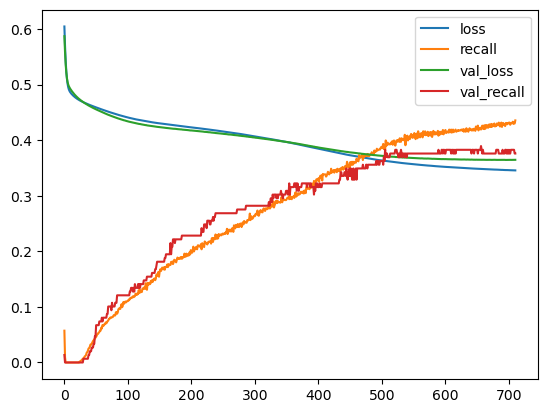

In [113]:
loss_df.plot()
plt.show()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [114]:
y_pred = model7.predict(X_test_transformed) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 3ms/step
[[2308   81]
 [ 338  273]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2389
           1       0.77      0.45      0.57       611

    accuracy                           0.86      3000
   macro avg       0.82      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000



94/94 [==============================] - 0s 3ms/step


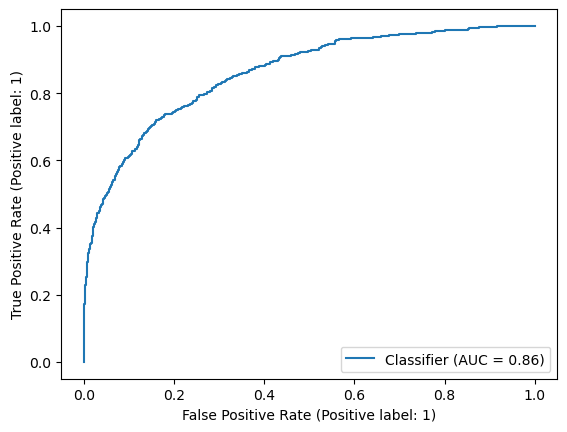

In [115]:
y_pred_proba = model7.predict(X_test_transformed)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

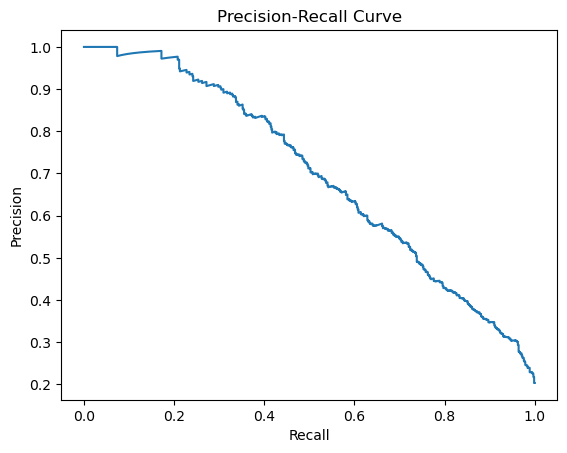

In [116]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Final Model and Model Deployment

In [117]:
import joblib


In [118]:
joblib.dump(column_trans, 'column_trans.pkl')


['column_trans.pkl']

In [119]:
joblib.dump(pipe_model, 'pipe_model.pkl')


['pipe_model.pkl']

In [123]:
model3.save('best_model.h5')

In [124]:
column_trans1 = joblib.load('column_trans.pkl')
pipe_model1 = joblib.load('pipe_model.pkl')
best_model1 = tf.keras.models.load_model('best_model.h5')

## Prediction

In [125]:
# input_sample = np.array([[584, "Spain", "Female", 67,3,87650.42,2,1,0,35423.87]])  # Example input sample

In [138]:
input_sample = pd.DataFrame([[584, "Spain", "Female", 67, 3, 87650.42, 2, 1, 0, 35423.87]],
                            columns=['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
                                     'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'])

In [139]:
input_sample

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,584,Spain,Female,67,3,87650.42,2,1,0,35423.87


In [140]:
# Transform the new data using the loaded transformer and pipeline
# Apply the column transformer to the input sample
input_sample_transformed = column_trans1.transform(input_sample)



In [141]:

# Apply the pipeline to the transformed input sample
# input_sample_processed = pipe_model1.transform(input_sample_transformed)



In [143]:
# Make predictions using the best model
predictions = best_model1.predict(input_sample_transformed)> 0.5


1/1 [==============================] - 0s 50ms/step


In [144]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___